# Cancellation hotel booking project. 


## Objective

* Predicting which booking is likely to be canceled.
* Analyzing  he data provided to find which factors have a high influence on booking cancellations.
* Building a predictive model that can predict which booking is going to be canceled in advance. 
* Help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.



* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [191]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,

)
sns.set_context('poster',font_scale=1)
sns. set_style('ticks')

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Import Dataset

In [192]:
hotel = pd.read_csv('INNHOTELSGROUP.csv') ##  Fill the blank to read the data

<IPython.core.display.Javascript object>

In [193]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [194]:
data.head() 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [195]:
data.tail() 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

### Understand the shape of the dataset

In [196]:
data.shape 

(36275, 19)

<IPython.core.display.Javascript object>

### Check the data types of the columns for the dataset

In [197]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [198]:
# checking for duplicate values
data.duplicated().any() 

False

<IPython.core.display.Javascript object>

**Let's drop the Booking_ID column first before we proceed forward**.

In [199]:
data = data.drop('Booking_ID',axis=1)  

<IPython.core.display.Javascript object>

In [200]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [201]:
data.describe() 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000
mean,1.84496,0.10528,0.81072,2.20430,0.03099,85.23256,2017.82043,7.42365,15.59700,0.02564,0.02335,0.15341,103.42354,0.61966
std,0.51871,0.40265,0.87064,1.41090,0.17328,85.93082,0.38384,3.06989,8.74045,0.15805,0.36833,1.75417,35.08942,0.78624
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2017.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,0.00000,0.00000,1.00000,0.00000,17.00000,2018.00000,5.00000,8.00000,0.00000,0.00000,0.00000,80.30000,0.00000
50%,2.00000,0.00000,1.00000,2.00000,0.00000,57.00000,2018.00000,8.00000,16.00000,0.00000,0.00000,0.00000,99.45000,0.00000
75%,2.00000,0.00000,2.00000,3.00000,0.00000,126.00000,2018.00000,10.00000,23.00000,0.00000,0.00000,0.00000,120.00000,1.00000
max,4.00000,10.00000,7.00000,17.00000,1.00000,443.00000,2018.00000,12.00000,31.00000,1.00000,13.00000,58.00000,540.00000,5.00000


<IPython.core.display.Javascript object>

### Univariate Analysis

In [202]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None,color='brown'):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
 
    f2, ( ax_hist2,ax_box2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.75, 0.25)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color=color
    )  # boxplot will be created and a star will indicate the mean value of the column
    ax_box2.set_xlabel('{}'.format(feature.replace('_',' ').title()))
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.savefig(feature+'_histbox.png',dpi=300)


<IPython.core.display.Javascript object>

### Observations on lead time

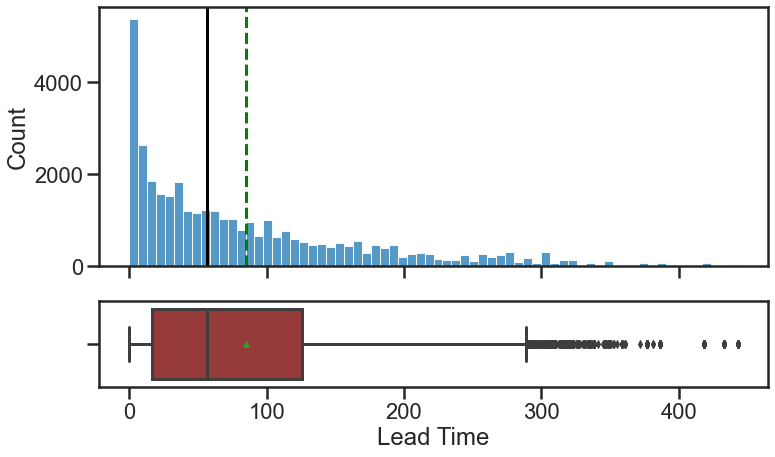

<IPython.core.display.Javascript object>

In [203]:
histogram_boxplot(data, "lead_time")

### Observations on average price per room

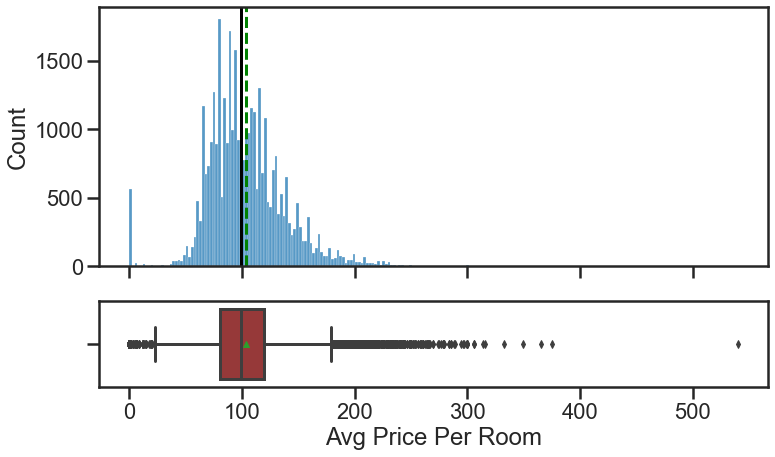

<IPython.core.display.Javascript object>

In [204]:
histogram_boxplot(data,'avg_price_per_room')  

In [205]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


<IPython.core.display.Javascript object>

In [206]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

In [207]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)  

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

<IPython.core.display.Javascript object>

In [208]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

<IPython.core.display.Javascript object>

### Observations on number of previous booking cancellations

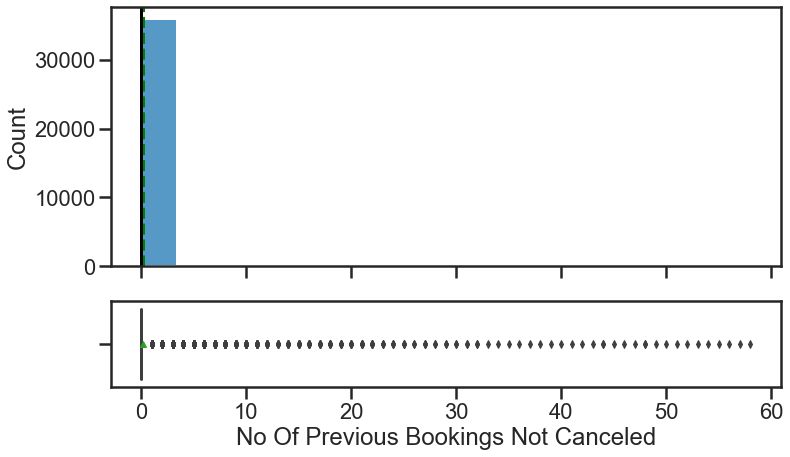

<IPython.core.display.Javascript object>

In [209]:
histogram_boxplot(data,'no_of_previous_bookings_not_canceled') 

### Observations on number of previous booking not canceled

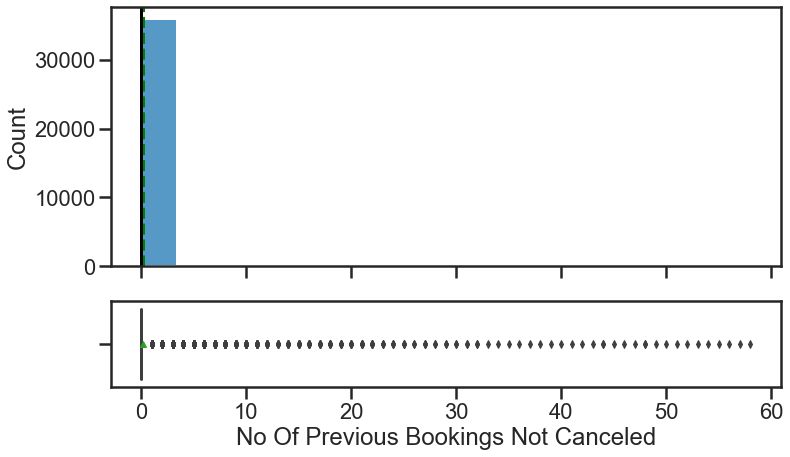

<IPython.core.display.Javascript object>

In [210]:
histogram_boxplot(data,'no_of_previous_bookings_not_canceled') 

In [211]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None,palette='Paired',figsize=(8,8)):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
        plt.tight_layout()
    else:
        plt.figure(figsize=(n + 1, 5))
        plt.tight_layout()

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette=palette,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.3f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=14,
            weight='bold',
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.xlabel('{}'.format(feature.replace('_',' ').title()))
    #plt.tight_layout()
    plt.savefig(feature+'_bars.png',dpi=200,bbox_inches='tight') # save
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on number of adults

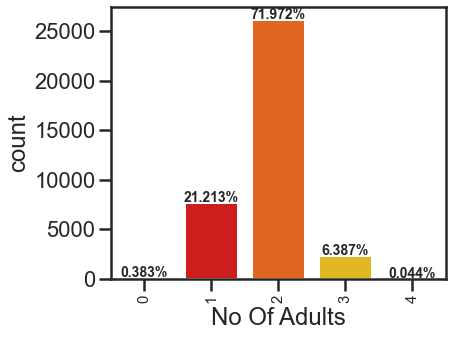

<IPython.core.display.Javascript object>

In [212]:
labeled_barplot(data, "no_of_adults", perc=True,palette='hot')

### Observations on number of children

In [213]:
data.no_of_children.value_counts(normalize=True)

0    0.92562
1    0.04460
2    0.02917
3    0.00052
9    0.00006
10   0.00003
Name: no_of_children, dtype: float64

<IPython.core.display.Javascript object>

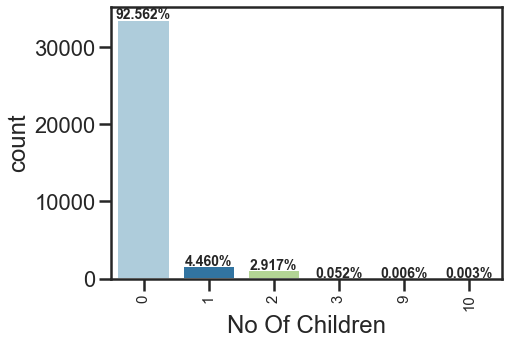

<IPython.core.display.Javascript object>

In [214]:
labeled_barplot(data,'no_of_children')  

In [215]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

### Observations on number of week nights

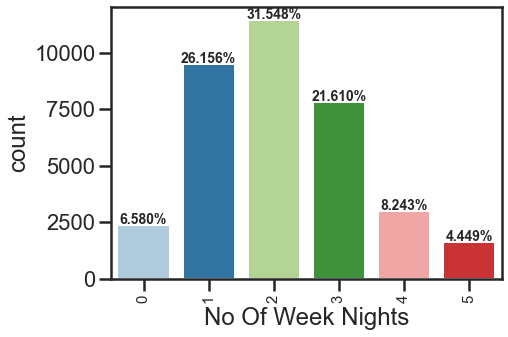

<IPython.core.display.Javascript object>

In [216]:
labeled_barplot(data,'no_of_week_nights',perc=True,n=6)  

### Observations on number of weekend nights

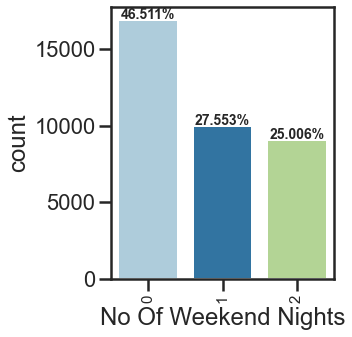

<IPython.core.display.Javascript object>

In [217]:
labeled_barplot(data,'no_of_weekend_nights',n=3)  

### Observations on required car parking space

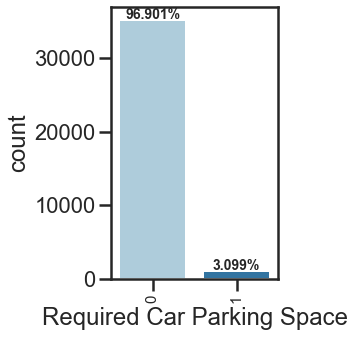

<IPython.core.display.Javascript object>

In [218]:
labeled_barplot(data,'required_car_parking_space')  

### Observations on type of meal plan

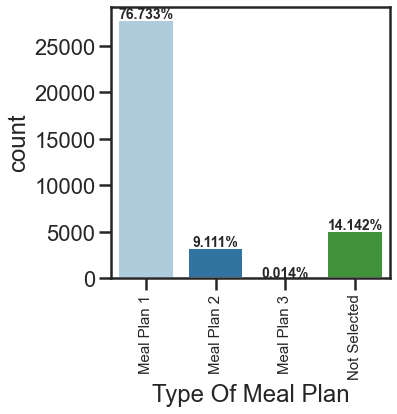

<IPython.core.display.Javascript object>

In [219]:
labeled_barplot(data,'type_of_meal_plan')  

### Observations on room type reserved

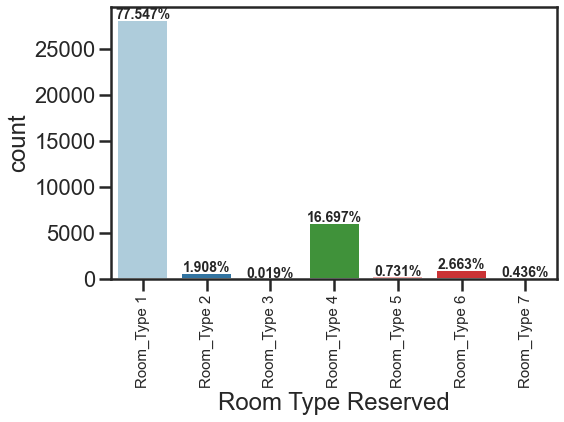

<IPython.core.display.Javascript object>

In [220]:
labeled_barplot(data,'room_type_reserved')  

### Observations on arrival month

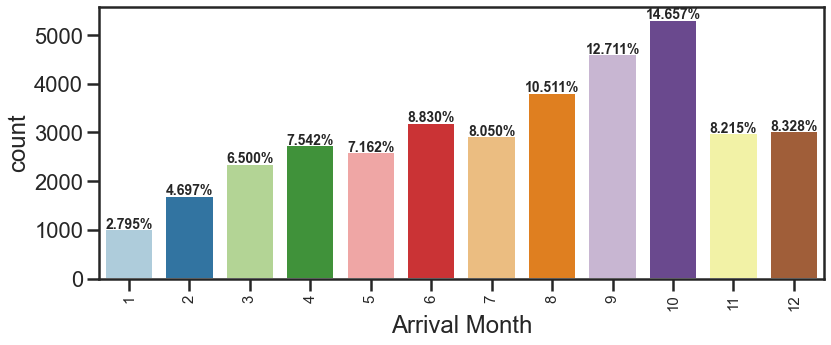

<IPython.core.display.Javascript object>

In [221]:
labeled_barplot(data,'arrival_month')  

### Observations on market segment type

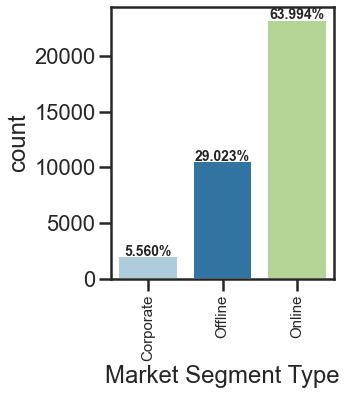

<IPython.core.display.Javascript object>

In [222]:
labeled_barplot(data,'market_segment_type',n=3) 

### Observations on number of special requests

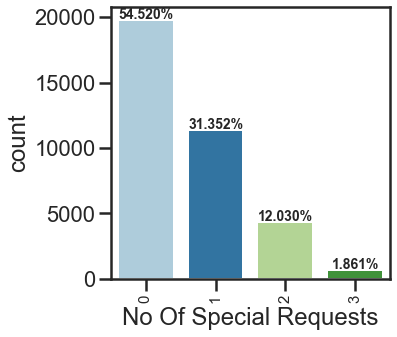

<IPython.core.display.Javascript object>

In [223]:
labeled_barplot(data,'no_of_special_requests',n=4) 

### Observations on booking status

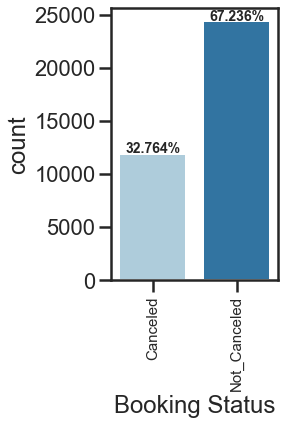

<IPython.core.display.Javascript object>

In [224]:
labeled_barplot(data,'booking_status')  

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [225]:
#data["booking_status"] = data["booking_status"].apply(
#    lambda x: 1 if x == "Canceled" else 0
#)

<IPython.core.display.Javascript object>

### Bivariate Analysis

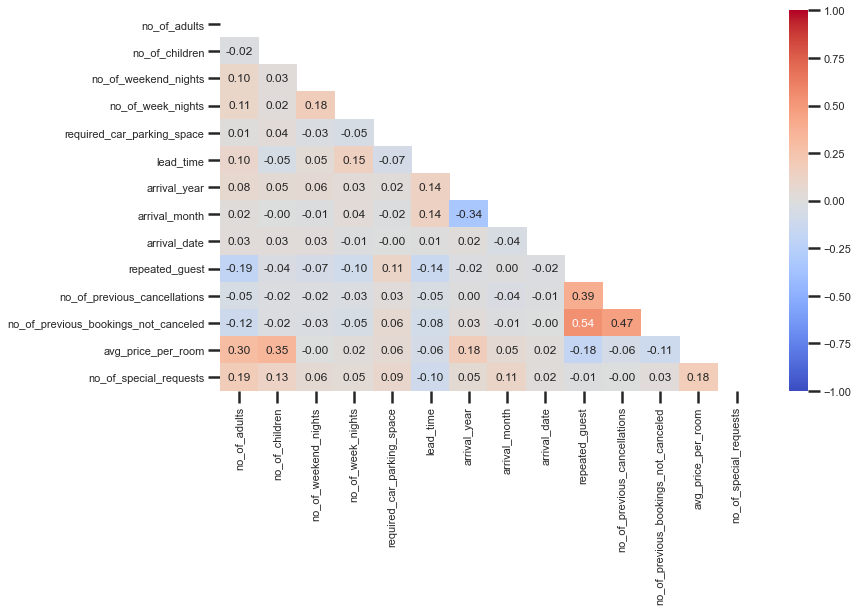

<IPython.core.display.Javascript object>

In [226]:
sns.set_context('poster',font_scale=0.5)
cols_list = data.select_dtypes(include=np.number).columns.tolist()
corr=  data[cols_list].corr()
mask = np.triu(corr)
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm",
mask=mask)
plt.savefig('hotmap.png',dpi=200,bbox_inches='tight')
plt.show()

**Creating functions that will help us with further analysis.**

In [227]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 0].set_xlabel('{}'.format(predictor.replace('_',' ').title()))

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )
    axs[0, 1].set_xlabel('{}'.format(predictor.replace('_',' ').title()))

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].set_xlabel('{}'.format(target.replace('_',' ').title()))

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    axs[1, 1].set_xlabel('{}'.format(target.replace('_',' ').title()))
    plt.tight_layout()
    plt.savefig(predictor+target+'hist.png',dpi=200,bbox_inches='tight') # save
    plt.show()

<IPython.core.display.Javascript object>

In [228]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
   
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.xlabel('{}'.format(predictor.replace('_',' ').title()))
    plt.ylabel('{}'.format(target.replace('_',' ').title()))
    
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.savefig(predictor+target+'_stakedbars.png',dpi=200,bbox_inches='tight') # save
    plt.show()

<IPython.core.display.Javascript object>

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

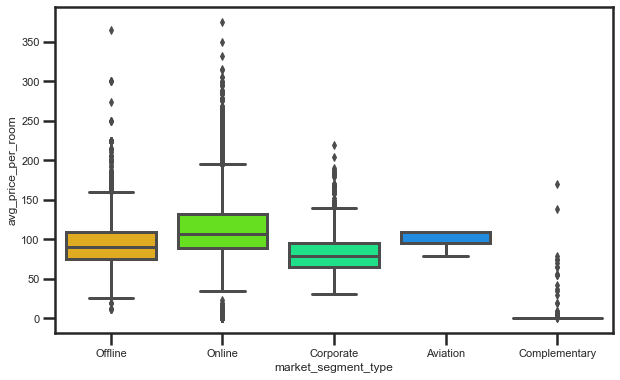

<IPython.core.display.Javascript object>

In [229]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.savefig('marketsegement_price.png')
plt.show()

**Let's see how booking status varies across different market segments. Also, how average price per room impacts booking status**

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


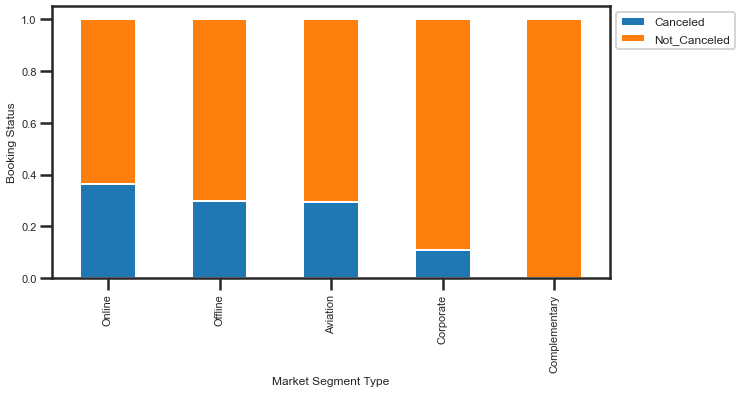

<IPython.core.display.Javascript object>

In [230]:
stacked_barplot(data, "market_segment_type", "booking_status")

**Many guests have special requirements when booking a hotel room. Let's see how it impacts cancellations**

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


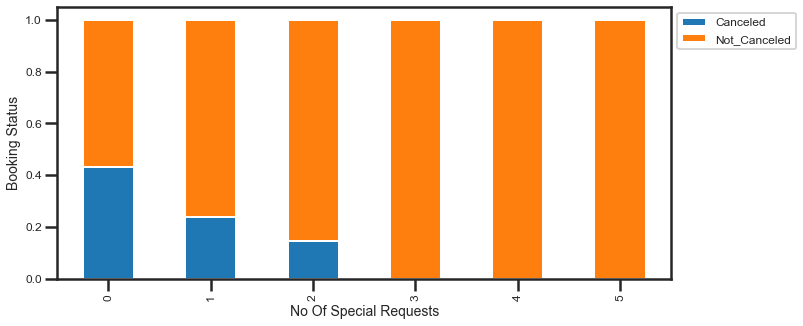

<IPython.core.display.Javascript object>

In [231]:
stacked_barplot(data, "no_of_special_requests", "booking_status"  ) 

In [232]:
data.avg_price_per_room

0        65.00000
1       106.68000
2        60.00000
3       100.00000
4        94.50000
           ...   
36270   167.80000
36271    90.95000
36272    98.39000
36273    94.50000
36274   161.67000
Name: avg_price_per_room, Length: 36275, dtype: float64

<IPython.core.display.Javascript object>

**Let's see if the special requests made by the customers impacts the prices of a room**

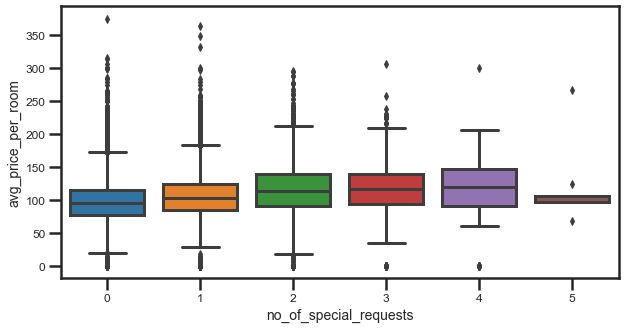

<IPython.core.display.Javascript object>

In [233]:
plt.figure(figsize=(10, 5))
sns.boxplot( x=data['no_of_special_requests'], y=data['avg_price_per_room']);  
plt.show()

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

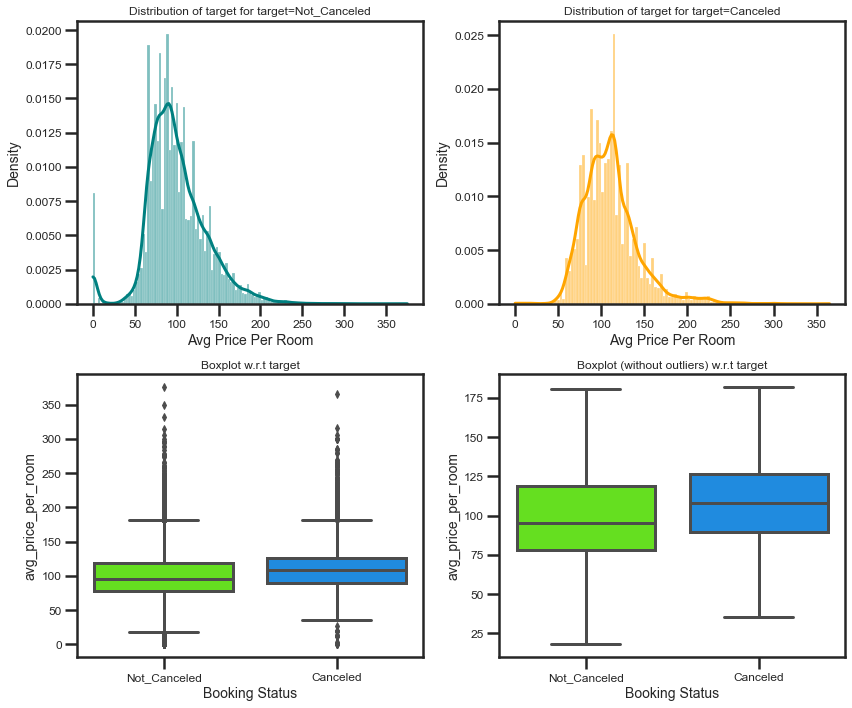

<IPython.core.display.Javascript object>

In [234]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

**There is a positive correlation between booking status and lead time also. Let's analyze it further**

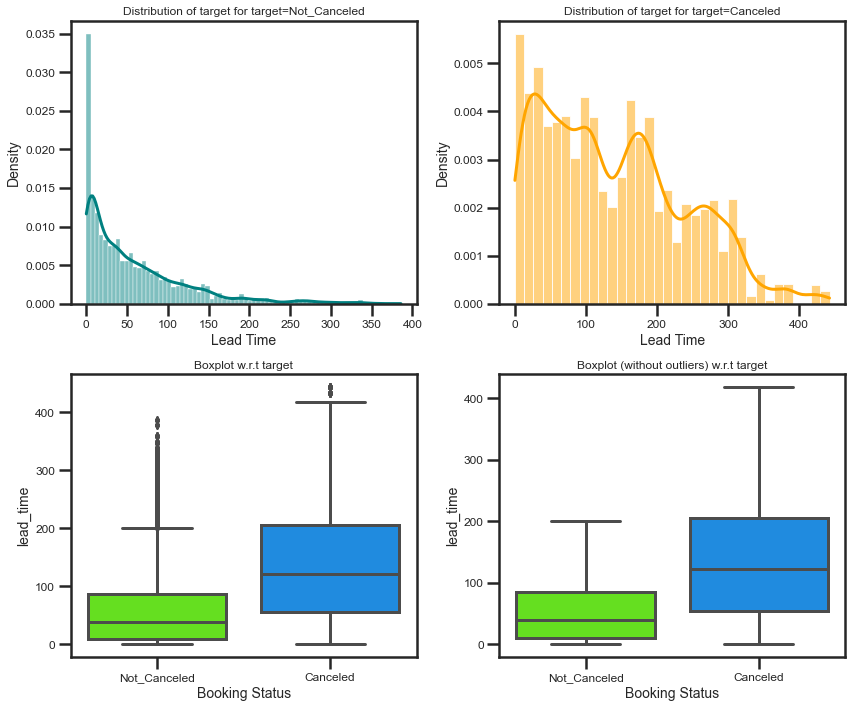

<IPython.core.display.Javascript object>

In [235]:
distribution_plot_wrt_target(data,'lead_time','booking_status') 

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [236]:
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

<IPython.core.display.Javascript object>

In [237]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

<IPython.core.display.Javascript object>

no_of_family_members      2     3    4   5    All
booking_status                                   
All                   23719  3793  912  17  28441
Not_Canceled          15506  2425  514  11  18456
Canceled               8213  1368  398   6   9985
------------------------------------------------------------------------------------------------------------------------


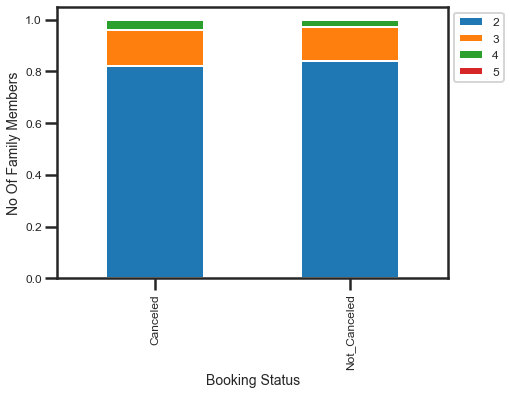

<IPython.core.display.Javascript object>

In [238]:
stacked_barplot(family_data,"booking_status","no_of_family_members") 

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [239]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

<IPython.core.display.Javascript object>

In [240]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

<IPython.core.display.Javascript object>

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                    6115         10979  17094
2                      2036          3663   5699
1                      1484          2922   4406
3                      1171          2488   3659
4                       589           872   1461
5                       547           809   1356
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                        2             1      3
--------------------

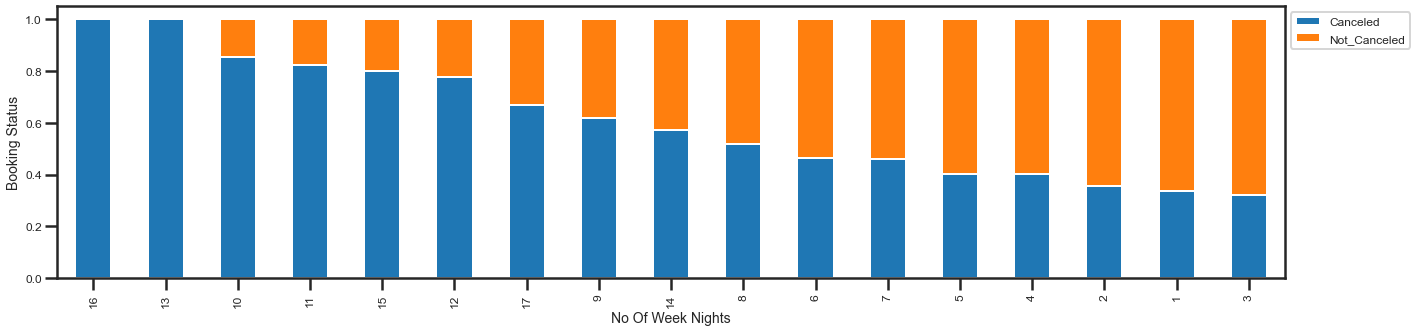

<IPython.core.display.Javascript object>

In [241]:
stacked_barplot(stay_data,"no_of_week_nights","booking_status") 

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                 6115         10979  17094
0                   6108         10812  16920
1                      7           167    174
------------------------------------------------------------------------------------------------------------------------


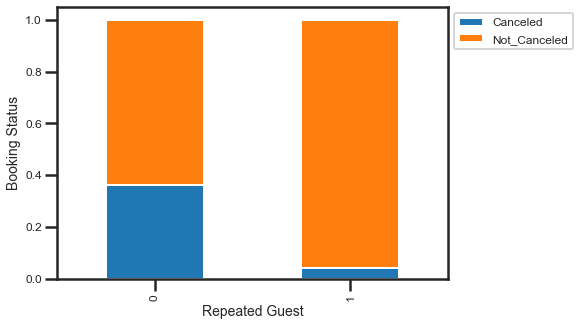

<IPython.core.display.Javascript object>

In [242]:
stacked_barplot(stay_data,"repeated_guest","booking_status") 

**Let's find out what are the busiest months in the hotel.**

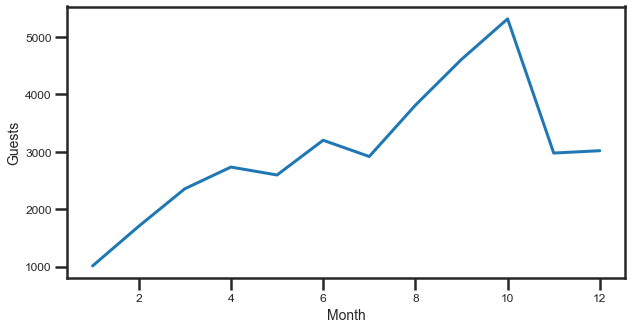

<IPython.core.display.Javascript object>

In [243]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

**Let's check the percentage of bookings canceled in each month.**

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


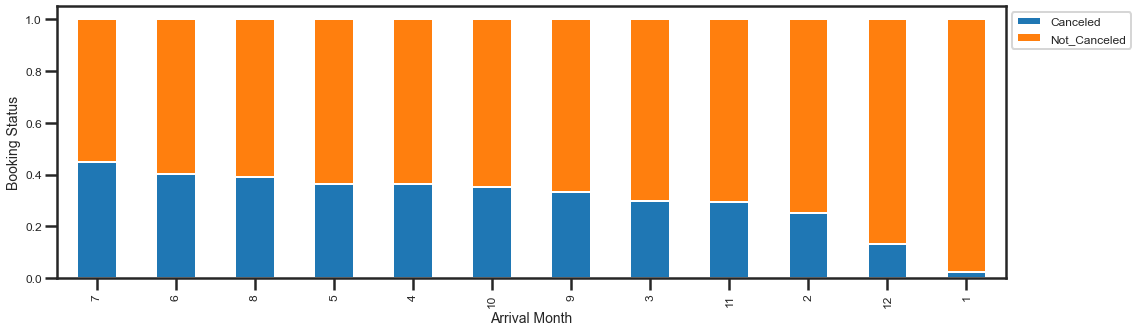

<IPython.core.display.Javascript object>

In [244]:
stacked_barplot(data,'arrival_month' ,'booking_status') 

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

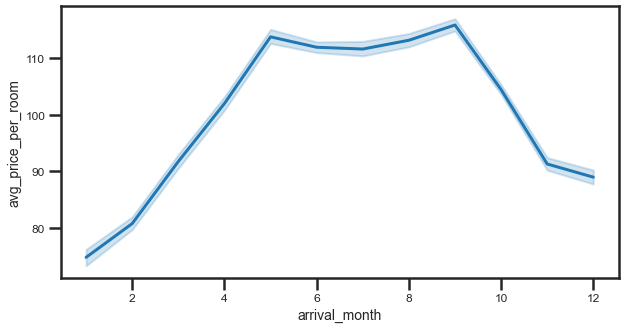

<IPython.core.display.Javascript object>

In [245]:
plt.figure(figsize=(10, 5))
sns.lineplot(data["arrival_month"],y=data["avg_price_per_room"]) 
plt.show()

## EDA observations:
* 1- 32 % of booking was canceled.
* 2- online market segment has the higher percentage of orders ~63%
* 3- 71% of the booking are 2 adults and 92% without kids. 
* 4- Online booking had higher median price while the complementary is the least median price. 
* 5- Booking with lower price median ~90$ did not canceled comparing with median price 110$ which was 
canceled . 
* 6- Complementary and Corporate have the least cancelation number comparing to other market segments.
* 7- Guests with more than 2 requests did not cancel their booking
* 8- The more lead time, the more likely the booking will be canceled. Lead time less than ~80 most likely will not 
be canceled 
* 9- Heatmap show that There is no strong correlation between the features. 
* 10- 10% repeating guests cancel while ~40% of non repeated guest was canceled 
* 11- 7 night and less have 50%  cancelation comparing to >7 nights. The less week-nights (1-3 nights) the more 
likely to not cancel the booking. 
* 12- Cancelation is much less during the Winter months ( Jan, Dec, February) comparing to summer months 
(July, June) 


### Outlier Check

- Let's check for outliers in the data.

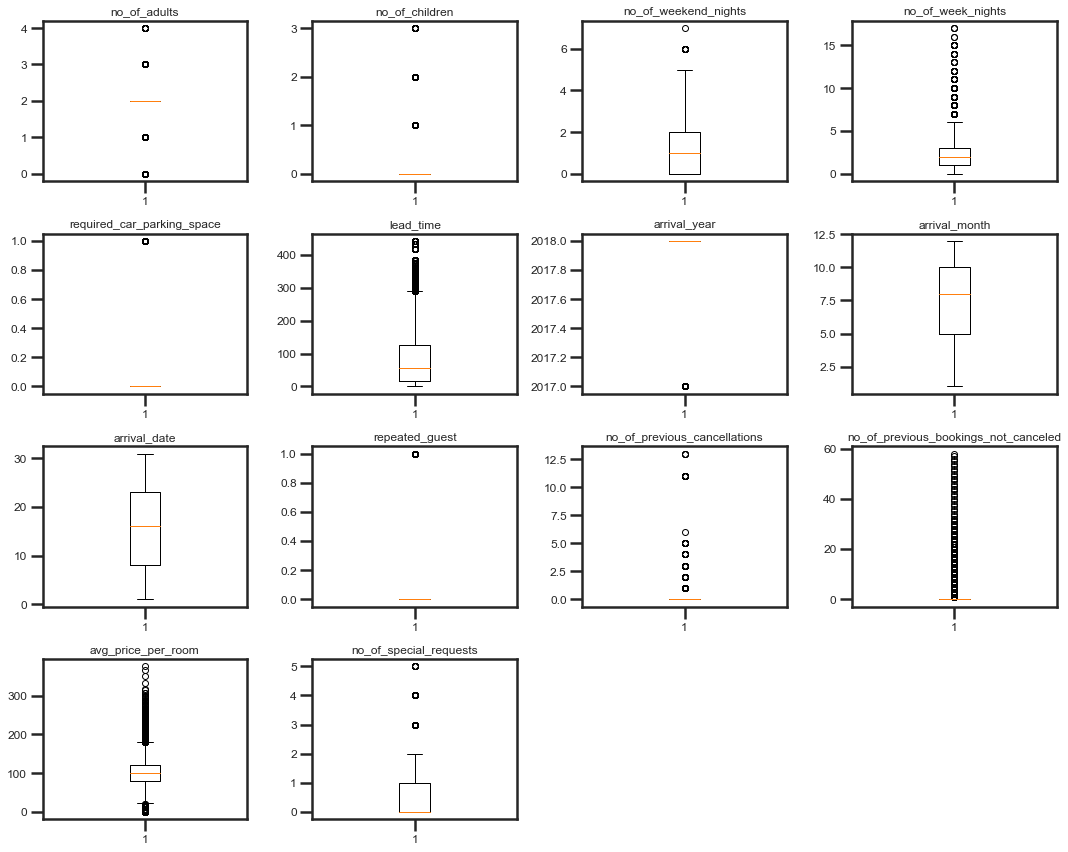

<IPython.core.display.Javascript object>

In [246]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
#numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.savefig('outliers.png',dpi=200)
plt.show()

### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [247]:
data["booking_status"]= data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)
data["booking_status"]


0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

<IPython.core.display.Javascript object>

In [248]:
data.select_dtypes('object')

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Offline
1,Not Selected,Room_Type 1,Online
2,Meal Plan 1,Room_Type 1,Online
3,Meal Plan 1,Room_Type 1,Online
4,Not Selected,Room_Type 1,Online
...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online
36271,Meal Plan 1,Room_Type 1,Online
36272,Meal Plan 1,Room_Type 1,Online
36273,Not Selected,Room_Type 1,Online


<IPython.core.display.Javascript object>

In [249]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X,drop_first=True) 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1) 

<IPython.core.display.Javascript object>

In [250]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [251]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [252]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with statsmodels library)

In [253]:

X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X) 

X = pd.get_dummies(X,drop_first=True)  

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3 ,random_state = 1) 

<IPython.core.display.Javascript object>

In [254]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg=logit.fit()

print(lg.summary()) 

         Current function value: 0.425090
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 09 Jun 2022   Pseudo R-squ.:                  0.3292
Time:                        12:15:29   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653

<IPython.core.display.Javascript object>

In [255]:
[ col for col in X_train.columns.tolist() if len(X_train[col].value_counts().index.tolist())==2]

['required_car_parking_space',
 'arrival_year',
 'repeated_guest',
 'type_of_meal_plan_Meal Plan 2',
 'type_of_meal_plan_Meal Plan 3',
 'type_of_meal_plan_Not Selected',
 'room_type_reserved_Room_Type 2',
 'room_type_reserved_Room_Type 3',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 5',
 'room_type_reserved_Room_Type 6',
 'room_type_reserved_Room_Type 7',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online']

<IPython.core.display.Javascript object>

In [256]:
y_train.value_counts()

0    17029
1     8363
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

In [257]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


<IPython.core.display.Javascript object>

### Multicollinearity

In [258]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [259]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


<IPython.core.display.Javascript object>

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [260]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [261]:
X_train.columns[~X_train.columns.isin(selected_features)]

Index(['arrival_date', 'no_of_previous_bookings_not_canceled',
       'type_of_meal_plan_Meal Plan 3', 'room_type_reserved_Room_Type 3',
       'market_segment_type_Complementary', 'market_segment_type_Online'],
      dtype='object')

<IPython.core.display.Javascript object>

In [262]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [263]:
logit1 = sm.Logit(y_train,X_train1) #
lg1 = logit1.fit() 
#print(lg1.summary()) 
summary_html=lg1.summary().as_html()
pd.read_html(summary_html,header=0, index_col=0)[1]

Optimization terminated successfully.
         Current function value: 0.425731
         Iterations 11


,coef,std err,z,P>|z|,[0.025,0.975]
const,-915.63910,120.47100,-7.60000,0.00000,-1151.75800,-679.52000
no_of_adults,0.10880,0.03700,2.91400,0.00400,0.03600,0.18200
no_of_children,0.15310,0.06200,2.47000,0.01400,0.03200,0.27500
no_of_weekend_nights,0.10860,0.02000,5.49800,0.00000,0.07000,0.14700
no_of_week_nights,0.04170,0.01200,3.39900,0.00100,0.01800,0.06600
required_car_parking_space,-1.59470,0.13800,-11.56400,0.00000,-1.86500,-1.32400
lead_time,0.01570,0.00000,59.21300,0.00000,0.01500,0.01600
arrival_year,0.45230,0.06000,7.57600,0.00000,0.33500,0.56900
arrival_month,-0.04250,0.00600,-6.59100,0.00000,-0.05500,-0.03000
repeated_guest,-2.73670,0.55700,-4.91600,0.00000,-3.82800,-1.64600


<IPython.core.display.Javascript object>

In [264]:
print("Training performance:")
model_performance_classification_statsmodels(lg1,X_train1,y_train) 

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


<IPython.core.display.Javascript object>

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

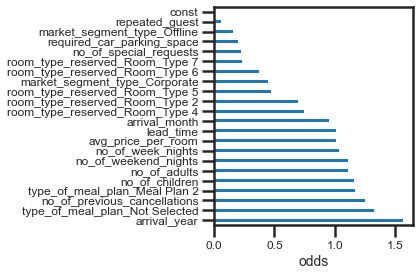

<IPython.core.display.Javascript object>

In [265]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).sort_values(by='Odds',ascending=False)['Odds'].plot.barh()
plt.xlabel('odds')
plt.tight_layout()
plt.savefig('odds.png')

In [266]:
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).sort_values(by='Odds',ascending=False)


,Odds,Change_odd%
arrival_year,1.57195,57.19508
type_of_meal_plan_Not Selected,1.33109,33.10947
no_of_previous_cancellations,1.25712,25.71181
type_of_meal_plan_Meal Plan 2,1.17846,17.84641
no_of_children,1.16546,16.54593
no_of_adults,1.11491,11.49096
no_of_weekend_nights,1.11470,11.46966
no_of_week_nights,1.04258,4.25841
avg_price_per_room,1.01937,1.93684
lead_time,1.01583,1.58331


<IPython.core.display.Javascript object>

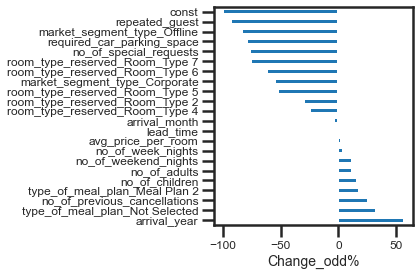

<IPython.core.display.Javascript object>

In [267]:
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).sort_values(by='Odds',ascending=False)['Change_odd%'].plot.barh()
plt.xlabel('Change_odd%')
plt.tight_layout()
plt.savefig('Change_odd%.png')


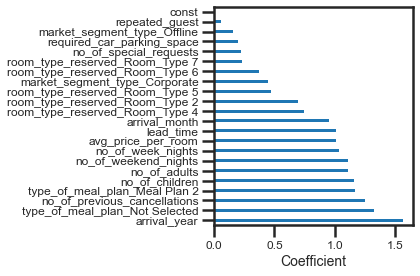

<IPython.core.display.Javascript object>

In [268]:
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).sort_values(by='Odds',ascending=False)['Odds'].plot.barh()
plt.xlabel('Coefficient')
plt.tight_layout()
plt.savefig('coefficient.png',bbox_tight=True)

#### Checking model performance on the training set

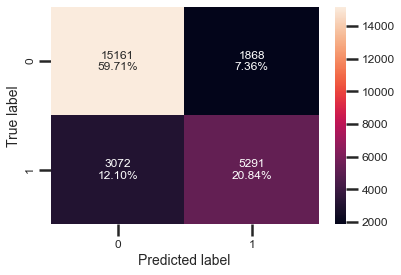

<IPython.core.display.Javascript object>

In [269]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)
plt.savefig('confusion_train_first.png',dpi=200,bbox_inches='tight')

In [324]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1 , y_train) 
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


<IPython.core.display.Javascript object>

#### ROC-AUC
* ROC-AUC on training set

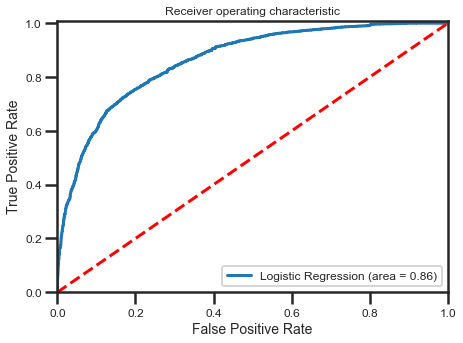

<IPython.core.display.Javascript object>

In [271]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig('roc_auc.png')
plt.show()

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [272]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708547


<IPython.core.display.Javascript object>

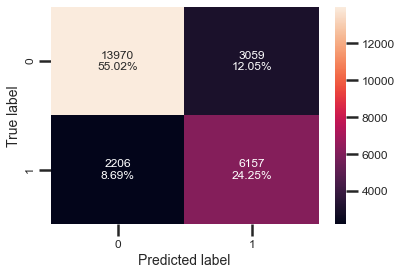

<IPython.core.display.Javascript object>

In [273]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
) 
plt.savefig('confusion_train.png',dpi=200,bbox_inches='tight')

In [325]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


<IPython.core.display.Javascript object>

#### Let's use Precision-Recall curve and see if we can find a better threshold

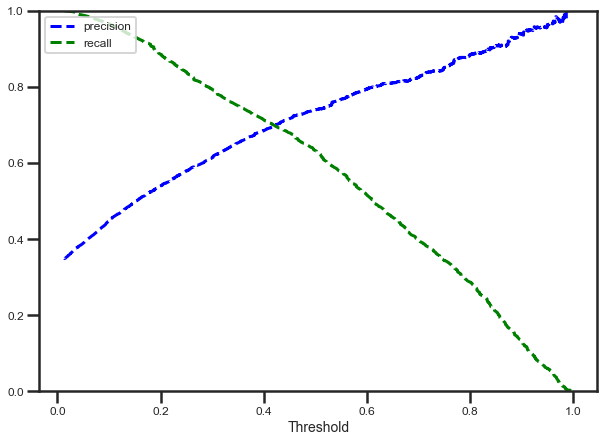

<IPython.core.display.Javascript object>

In [275]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.savefig('recall_precision.png')
plt.show()

In [276]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

#### Checking model performance on training set

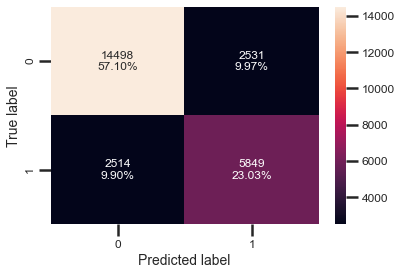

<IPython.core.display.Javascript object>

In [277]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1 , y_train, threshold=optimal_threshold_curve
) 

In [278]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Using model with default threshold**

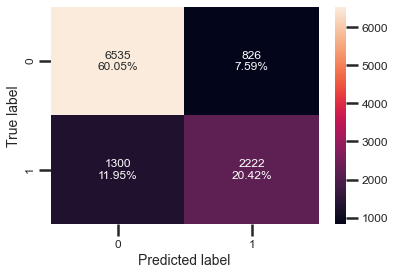

<IPython.core.display.Javascript object>

In [279]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test1, y_test) 

In [280]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1,X_test1, y_test) 

print("Test performance:")
log_reg_model_test_perf 

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


<IPython.core.display.Javascript object>

* ROC curve on test set

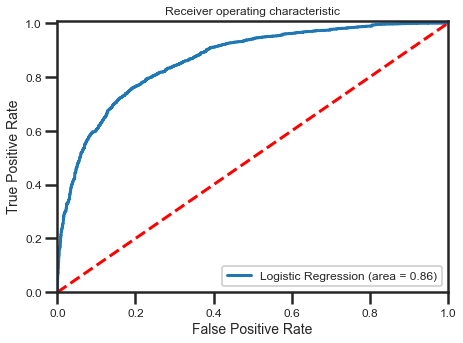

<IPython.core.display.Javascript object>

In [281]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

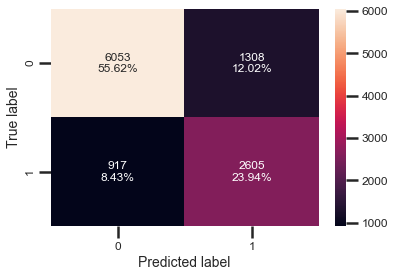

<IPython.core.display.Javascript object>

In [282]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test,0.37)   

In [283]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


<IPython.core.display.Javascript object>

**Using model with threshold = 0.42**

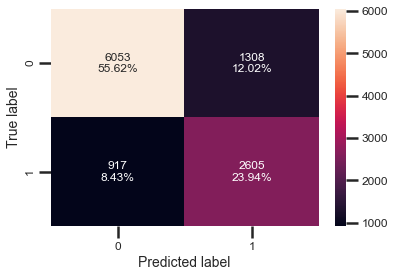

<IPython.core.display.Javascript object>

In [284]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1 , y_test,optimal_threshold_auc_roc) 

In [285]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


<IPython.core.display.Javascript object>

### Model performance summary

In [286]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


<IPython.core.display.Javascript object>

In [287]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_test_comp_df 

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


<IPython.core.display.Javascript object>

## Decision Tree

In [288]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X,drop_first=True) 

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1,test_size=0.3) 

<IPython.core.display.Javascript object>

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [289]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [290]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Building Decision Tree Model

In [291]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

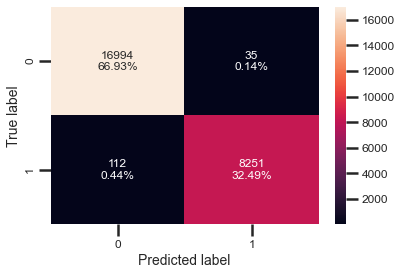

<IPython.core.display.Javascript object>

In [292]:
confusion_matrix_sklearn(model,X_train,y_train) 

In [293]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


<IPython.core.display.Javascript object>

#### Checking model performance on test set

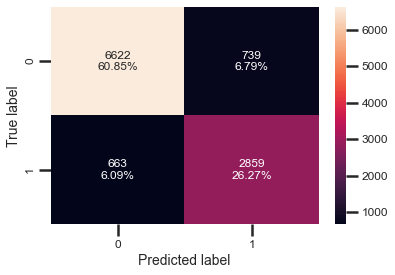

<IPython.core.display.Javascript object>

In [294]:
confusion_matrix_sklearn(model,X_test,y_test) 

In [295]:
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test,y_test) 
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


<IPython.core.display.Javascript object>

**Before pruning the tree let's check the important features.**

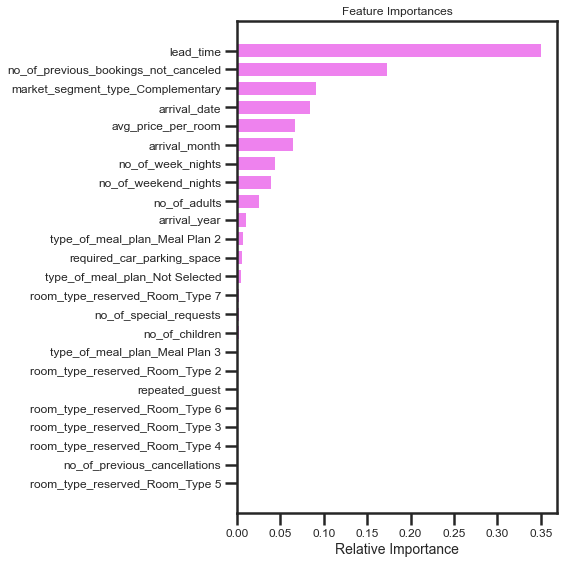

<IPython.core.display.Javascript object>

In [296]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
importances=importances[importances!=0.0]
indices = np.argsort(importances)
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.savefig('feature_importance_beforerpuning.png')
plt.show()

### Pruning the tree

**Pre-Pruning**

In [297]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

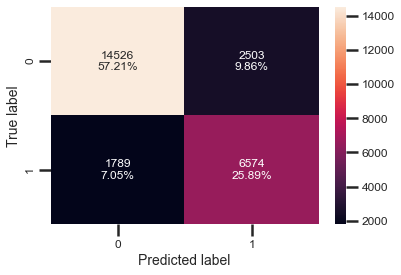

<IPython.core.display.Javascript object>

In [298]:
confusion_matrix_sklearn(estimator,X_train,y_train) 

In [299]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train,y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


<IPython.core.display.Javascript object>

#### Checking performance on test set

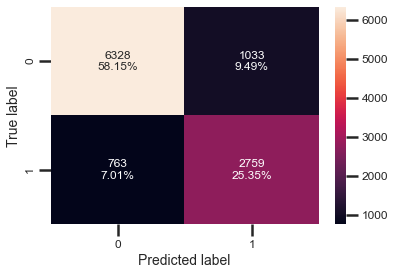

<IPython.core.display.Javascript object>

In [300]:
confusion_matrix_sklearn(estimator,X_test,y_test) 

In [301]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

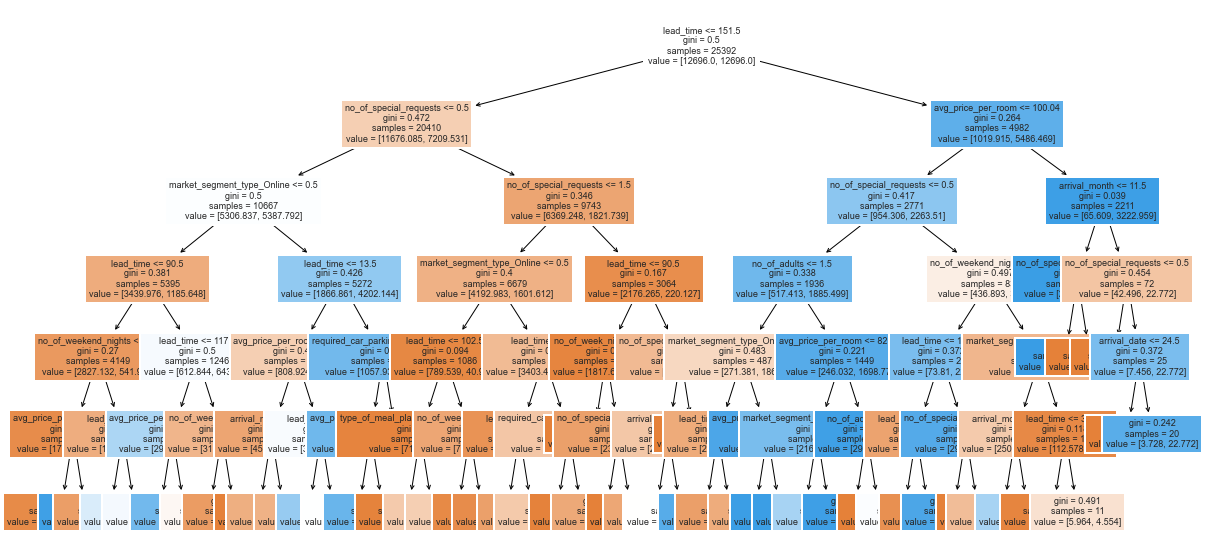

<IPython.core.display.Javascript object>

In [302]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.savefig('tree_pre_pruning.png')        
plt.show()

In [303]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

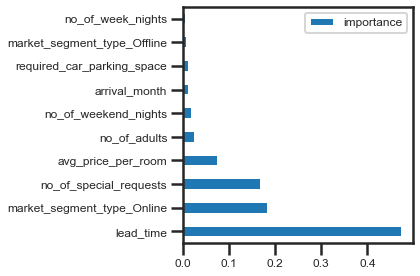

<IPython.core.display.Javascript object>

In [304]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)
pd.DataFrame(importances[indices],index=[feature_names[i] for i in indices],columns=['importance'] ).sort_values(by='importance',ascending=False)[:10].plot.barh()
plt.tight_layout()
plt.savefig('pre_prune.png')

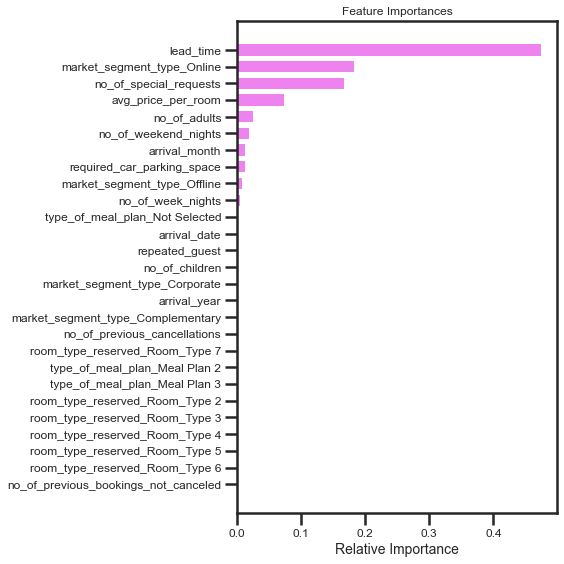

<IPython.core.display.Javascript object>

In [305]:


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.savefig('dt_prepruning.png')
plt.show()

**Cost Complexity Pruning**

In [306]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [307]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


<IPython.core.display.Javascript object>

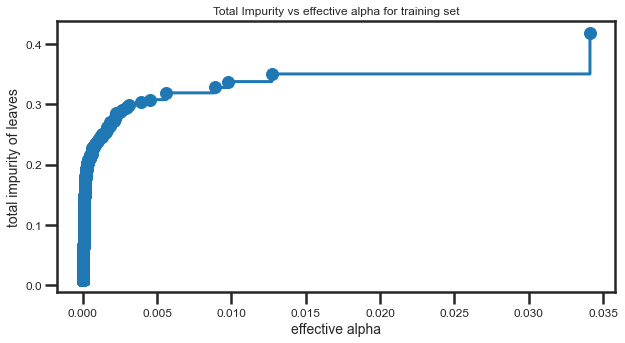

<IPython.core.display.Javascript object>

In [308]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [309]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train,y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


<IPython.core.display.Javascript object>

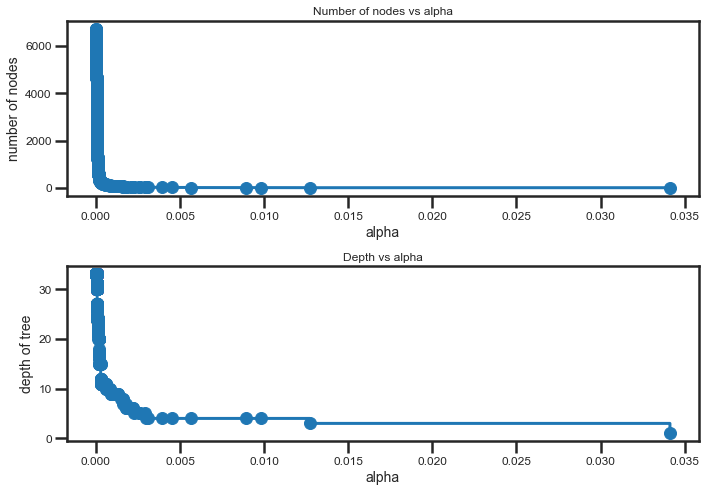

<IPython.core.display.Javascript object>

In [310]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [311]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

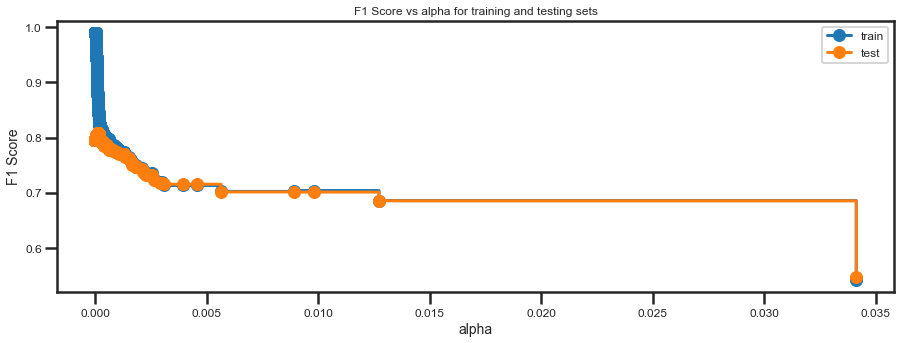

<IPython.core.display.Javascript object>

In [312]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [313]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

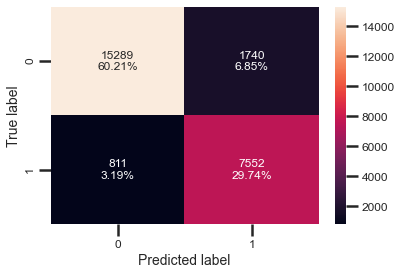

<IPython.core.display.Javascript object>

In [314]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [315]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


<IPython.core.display.Javascript object>

#### Checking performance on test set

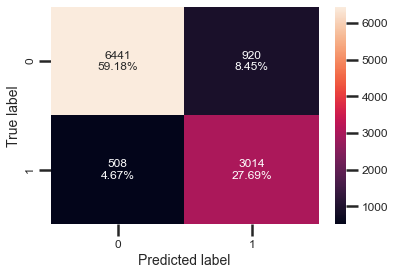

<IPython.core.display.Javascript object>

In [316]:
confusion_matrix_sklearn(best_model, X_test, y_test) 

In [317]:
decision_tree_post_test = model_performance_classification_sklearn(best_model, X_test, y_test) 

<IPython.core.display.Javascript object>

In [318]:
importances = best_model.feature_importances_
indices = np.argsort(importances)
importances

array([2.55157835e-02, 5.59802229e-04, 2.50567857e-02, 2.87607053e-02,
       1.00826478e-02, 3.93847859e-01, 1.89569753e-02, 5.92150113e-02,
       3.48613288e-02, 0.00000000e+00, 0.00000000e+00, 3.43040151e-04,
       1.23733226e-01, 1.20969770e-01, 6.61545432e-04, 0.00000000e+00,
       5.47452942e-03, 8.10594912e-04, 0.00000000e+00, 1.90554880e-03,
       5.77588077e-04, 9.64300828e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.41097304e-02, 1.33593227e-01])

<IPython.core.display.Javascript object>

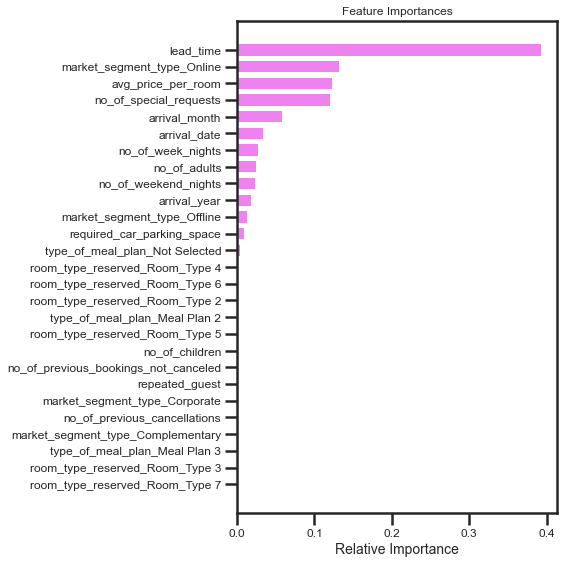

<IPython.core.display.Javascript object>

In [319]:


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.savefig('postpruning.png')
plt.show()

### Comparing Decision Tree models

In [320]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89954
Recall,0.98661,0.78608,0.90303
Precision,0.99578,0.72425,0.81274
F1,0.99117,0.75390,0.85551


<IPython.core.display.Javascript object>

In [133]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86879
Recall,0.81175,0.78336,0.85576
Precision,0.79461,0.72758,0.76614
F1,0.80309,0.75444,0.80848


<IPython.core.display.Javascript object>

## Random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

<IPython.core.display.Javascript object>

In [73]:
y_train.value_counts(normalize=True)

0   0.67064
1   0.32936
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

In [116]:
RT=RandomForestClassifier(class_weight='balanced',oob_score='True')
RT.fit(X_train,y_train)
random_forest_train_sklearn=model_performance_classification_sklearn(RT,X_train,y_train)
print(random_forest1_performance_train)
random_forest_test__sklearn=model_performance_classification_sklearn(RT,X_test,y_test)
print(random_forest1_performance_test)
print(f'oob_score is {RT.oob_score_}')

   Accuracy  Recall  Precision      F1
0   0.99378 0.99259    0.98857 0.99057
   Accuracy  Recall  Precision      F1
0   0.90324 0.80806    0.88303 0.84388


<IPython.core.display.Javascript object>

In [139]:
# to optimize our results using Greadsearchcv for hyperparameter tunning 
RT=RandomForestClassifier(class_weight='balanced',oob_score='True')
parameters={
     'n_estimators':[200,400,800,1000],
     'max_features':[0.4],   
}
scores=make_scorer(f1_score)
gs=GridSearchCV(RT, param_grid=parameters,n_jobs=-1)
gs.fit(X_train,y_train)
best_gs=gs.best_estimator_
print(best_gs)
print(model_performance_classification_sklearn(best_gs,X_train,y_train) )
print(model_performance_classification_sklearn(best_gs, X_test, y_test) )
print(f'oob_score is {best_gs.oob_score_}')

RandomForestClassifier(class_weight='balanced', max_features=0.4,
                       n_estimators=1000, oob_score='True')
   Accuracy  Recall  Precision      F1
0   0.99378 0.99295    0.98822 0.99058
   Accuracy  Recall  Precision      F1
0   0.90554 0.81516    0.88393 0.84815
oob_score is 0.9004017013232514


<IPython.core.display.Javascript object>

In [140]:
#  second Greadsearchcv for hyperparameter tunning 
parameters={'max_depth':np.arange(5,20,4) ,
"min_samples_split":np.arange(0,0.7,0.1),

}
scores=make_scorer(f1_score)
gs=GridSearchCV(best_gs, param_grid=parameters,n_jobs=-1,scoring=scores)
gs.fit(X_train,y_train)
best_gs1=gs.best_estimator_
print(best_gs1)

random_forest_train_gs=model_performance_classification_sklearn(best_gs1,X_train,y_train) 
random_forest_test_gs=model_performance_classification_sklearn(best_gs1, X_test, y_test) 
print(random_forest_train_gs)
print(random_forest_test_gs)
print(f'oob_score is {best_gs1.oob_score_}')

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=0.4,
                       min_samples_split=0.1, n_estimators=1000,
                       oob_score='True')
   Accuracy  Recall  Precision      F1
0   0.80927 0.75894    0.69185 0.72384
   Accuracy  Recall  Precision      F1
0   0.81090 0.76519    0.68645 0.72368
oob_score is 0.8086798991808444


<IPython.core.display.Javascript object>

In [181]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

<IPython.core.display.Javascript object>

In [182]:
#  second Greadsearchcv for hyperparameter tunning 
parameters={"min_samples_split":np.arange(0.001,0.1,0.01) ,


}
scores=make_scorer(f1_score)
gs2=GridSearchCV(best_gs1, param_grid=parameters,n_jobs=-1,scoring=scores)
gs2.fit(X_train,y_train)
best_gs2=gs2.best_estimator_
print(best_gs2)

random_forest_train_gs=model_performance_classification_sklearn(best_gs2,X_train,y_train) 
random_forest_test_gs=model_performance_classification_sklearn(best_gs2, X_test, y_test) 
print(random_forest_train_gs)
print(random_forest_test_gs)
print(f'oob_score is {best_gs2.oob_score_}')

RandomForestClassifier(class_weight='balanced', max_depth=9, max_features=0.4,
                       min_samples_split=0.001, n_estimators=1000,
                       oob_score='True')
   Accuracy  Recall  Precision      F1
0   0.88028 0.81275    0.82179 0.81724
   Accuracy  Recall  Precision      F1
0   0.87559 0.80153    0.81167 0.80657
oob_score is 0.8724795211090107


<IPython.core.display.Javascript object>

In [188]:
gs2.best_estimator_.max_features=0.4
gs2.best_estimator_.m_estimators=1000
gs2.best_estimator_.max_depth=12
gs3=gs2.best_estimator_
gs3.fit(X_train,y_train)
print(model_performance_classification_sklearn(gs3,X_train,y_train) )
print(model_performance_classification_sklearn(gs3, X_test, y_test) )

print(f'oob_score is {best_gs2.oob_score_}')

   Accuracy  Recall  Precision      F1
0   0.89587 0.85041    0.83621 0.84325
   Accuracy  Recall  Precision      F1
0   0.88579 0.82822    0.82053 0.82436
oob_score is 0.8814981096408318


<IPython.core.display.Javascript object>

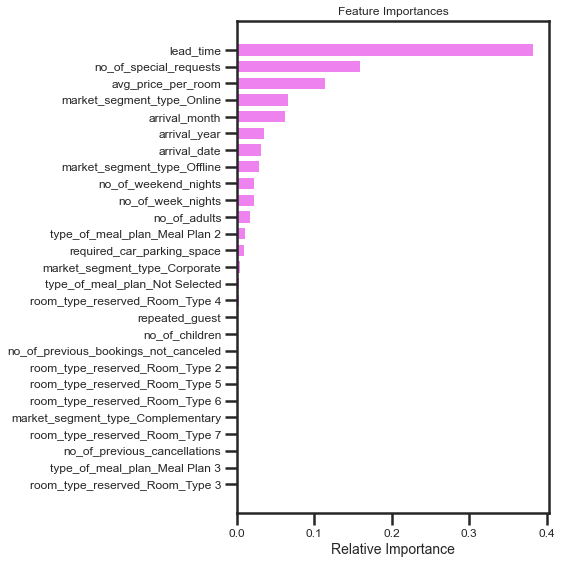

<IPython.core.display.Javascript object>

In [190]:
rf_model=pd.DataFrame({'features':gs3.feature_names_in_ , 'importance':gs3.feature_importances_}).set_index('features').sort_values(by='importance')
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(rf_model.index,rf_model['importance'], color="violet", align="center")
#plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.savefig('rf.png')
plt.show()

### Business Recommendations
* The most important feature affect the cancelation in order: [ lead_time, 
market_segment_type_Online, no_of_special_requests, avg_price_per_room, no_of_adults, 
no_of_weekend_nights, arrival_month, required_car_parking_space, market_segment_type_Offline, 
no_of_week_nights, type_of_meal_plan_Not Selected, arrival_date. 
*  Guests check all the previous features have high risk of cancelation therefor we need to come up with
a plan to secure the reservations. E. g. 1.  Online reservations without any request and with lead time 
more than 100 days in summer  need to have fee for cancelation which increases with decreasing the 
days left to the check in date.  2.  Prepaid  with discount, this policy will make the cancelation much 
harder and increase the credibility and the profit.  3. booking for more than 7 day need to have extra 
fee for cancelation could be 50% of the total cost. Staying week-nights >5 need higher fee for 
cancelation than <5. 

* Regular guests who make the order offline and asked for parking and other requests 
most likely are trusted guests. No need to over secure their booking, I recommend give 
them extra credit to your loyal guests. 
* Future work. We will be able to apply ensemble model such as xgboost which will improve our recent 
result. More data will help in improving the results as well. This dataset for INN Hotels Group has a 
chain of hotels in Portugal 



performance comparison:


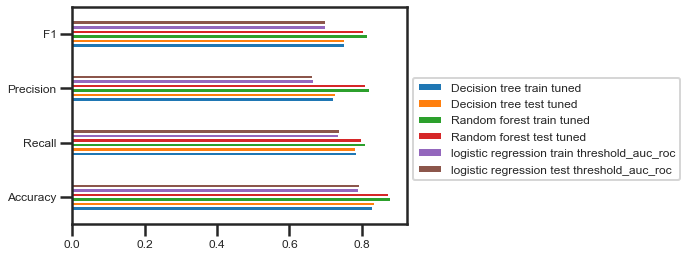

<IPython.core.display.Javascript object>

In [342]:
models_test_train_df = pd.concat(
    [ decision_tree_tune_perf_train.T,
      decision_tree_tune_perf_test.T,
        random_forest_train_gs.T,
        random_forest_test_gs.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_auc_roc.T
        
    ],
    axis=1,
)
models_test_train_df.columns = [
    "Decision tree train tuned",
     "Decision tree test tuned",
    "Random forest train tuned",
    "Random forest test tuned",
    "logistic regression train threshold_auc_roc",
    "logistic regression test threshold_auc_roc",    
]
print("performance comparison:")
models_test_train_df.plot.barh()
plt.legend(bbox_to_anchor=(1, 0.2, 0.5, 0.5))
